### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
# Git hub link: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-BabuRect

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import re

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
# read movie rating csv file
df_Rating = pd.read_csv("Data.csv")

#read movie info csv file
df_MovieInfo = pd.read_csv("item.csv")

#read audience info csv file
df_Audience = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [4]:
# shape of the data frames
df_Rating.shape, df_MovieInfo.shape, df_Audience.shape

((100000, 4), (1681, 22), (943, 5))

In [18]:
# describe rating
df_Rating.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [19]:
# Movie info describe
df_MovieInfo.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# user data describe
df_Audience.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [5]:
# Check for null in each of the data frames
print(df_Rating.isnull().sum())
print("Total number of null values in the rating data = ",df_Rating.isnull().sum().sum())
print("")

print(df_MovieInfo.isnull().sum())
print("Total number of null values in the movie data = ",df_MovieInfo.isnull().sum().sum())
print("")

print(df_Audience.isnull().sum())
print("Total number of null values in the audience data = ",df_Audience.isnull().sum().sum())

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64
Total number of null values in the rating data =  0

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
Total number of null values in the movie data =  0

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64
Total number of null values in the audience data =  0


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [27]:
# use sum on the default axis.As the sum of movies ids/title/release data does not make any 
# sense we can drop it from result data frame
genreSumDf = df_MovieInfo.sum().drop(['movie id','movie title','release date'])
print(genreSumDf)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: object


#### 5. Find the movies that have more than one genre - 5 marks

In [32]:
#hint: use sum on the axis = 1

# drop the movie id other it will be added when you sum all the columns of a row
# Have only the genre columns
df_genreOnly = df_MovieInfo.drop(['movie id','release date'],axis = 1)

# sum all the genre ( sum of all column values of a row) and check 
# if it is more than 1 and get the title of them
df_genreOnly[df_genreOnly.sum(axis=1) > 1]['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [37]:
# Find the movie whose genre is unknown and drop it

# get the index of the row whose genre is unknows
unknownIndex = df_MovieInfo[df_MovieInfo['unknown'] > 0].index 
print("Row to be removed is at", unknownIndex)

# drop the row
unknwnDroppedDf = df_MovieInfo.drop(unknownIndex, axis = 0)
unknwnDroppedDf

Row to be removed is at Int64Index([1371], dtype='int64')


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [9]:
# HINT: Use distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)

In [10]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
#print(a[-5:])

brown


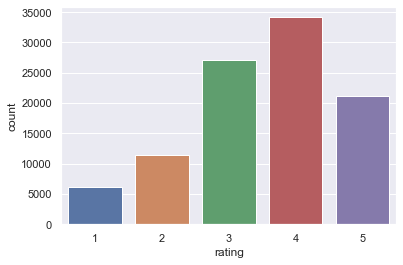

In [11]:
#your answers here
sns.set(color_codes=True)

# univariate plot of rating. Plots count of each rating
sns.countplot(df_Rating.rating);

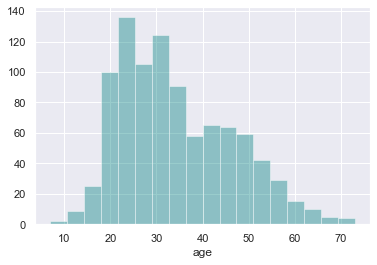

In [42]:
# plot of age. It does not make sense to plot count plot for age rather histogram gives
# us the distribution
sns.distplot(df_Audience.age,kde=False,color='teal');

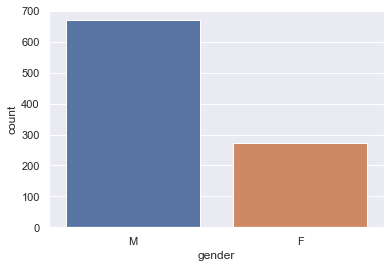

In [44]:
# gender plot. Use the count plot to plot the count of men and women
sns.countplot(df_Audience.gender);

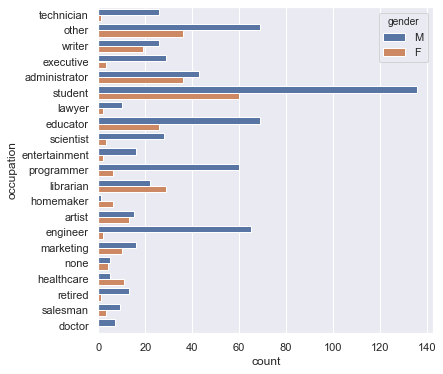

In [57]:
# Occupation plot. Count plot to show the count of each occupation
plot.figure(figsize = (6,6))

# Plot the occupation in yaxis instead of xaxis as the number of labels are more. 
# We can use gender as hue to show gender distribution in each occupation
sns.countplot(y='occupation',hue='gender',data=df_Audience);

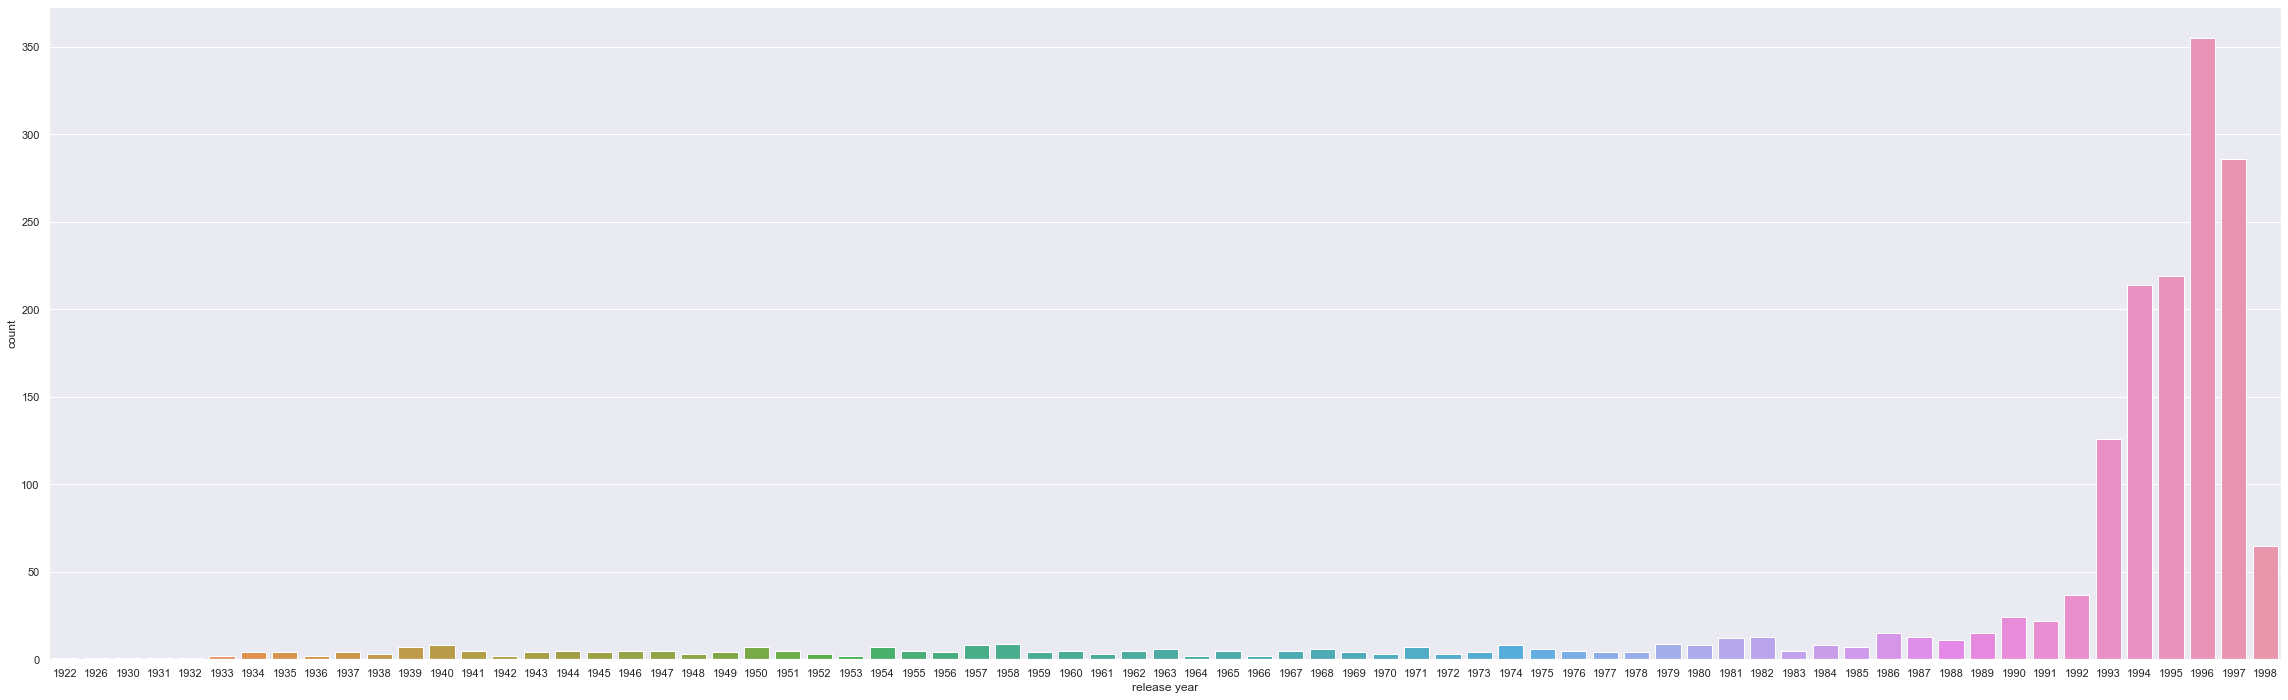

In [90]:
# year plot

# Method to get the year from the date
def getyear(x):
    pattern = re.compile(r'\d{4}')
    matches = pattern.search(x)
    return matches.group(0)

# Method given in hint to get the year
def GetYear(x):
    return(x.split('-')[2])

# Take the copy of the dataframe
dfMovieInfoCopy = df_MovieInfo.copy()

# Extract the year from the release data and insert it as new column in the .
# we can use either getyear or GetYear method to get the year from the release date
dfMovieInfoCopy['release year'] = df_MovieInfo['release date'].apply(getyear)

# If you want the plot to be vertical
plot.figure(figsize = (40,12))
sns.countplot(x = dfMovieInfoCopy['release year']);

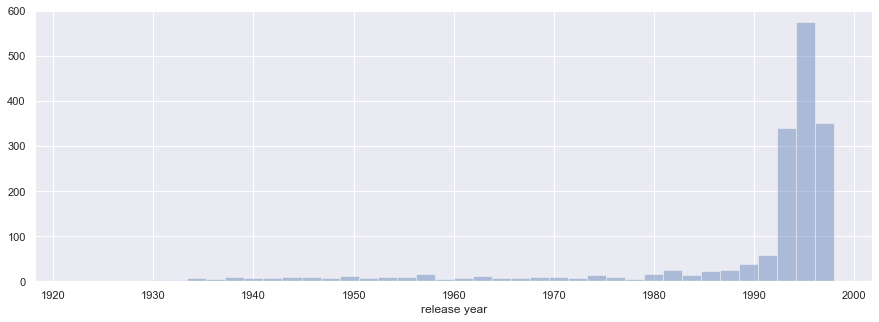

In [83]:
# Instead of plotting count on each year, better we can have distplot to have bins
plot.figure(figsize = (15,5))
sns.distplot(dfMovieInfoCopy['release year'],bins=40, kde=False);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

<Figure size 7200x720 with 0 Axes>

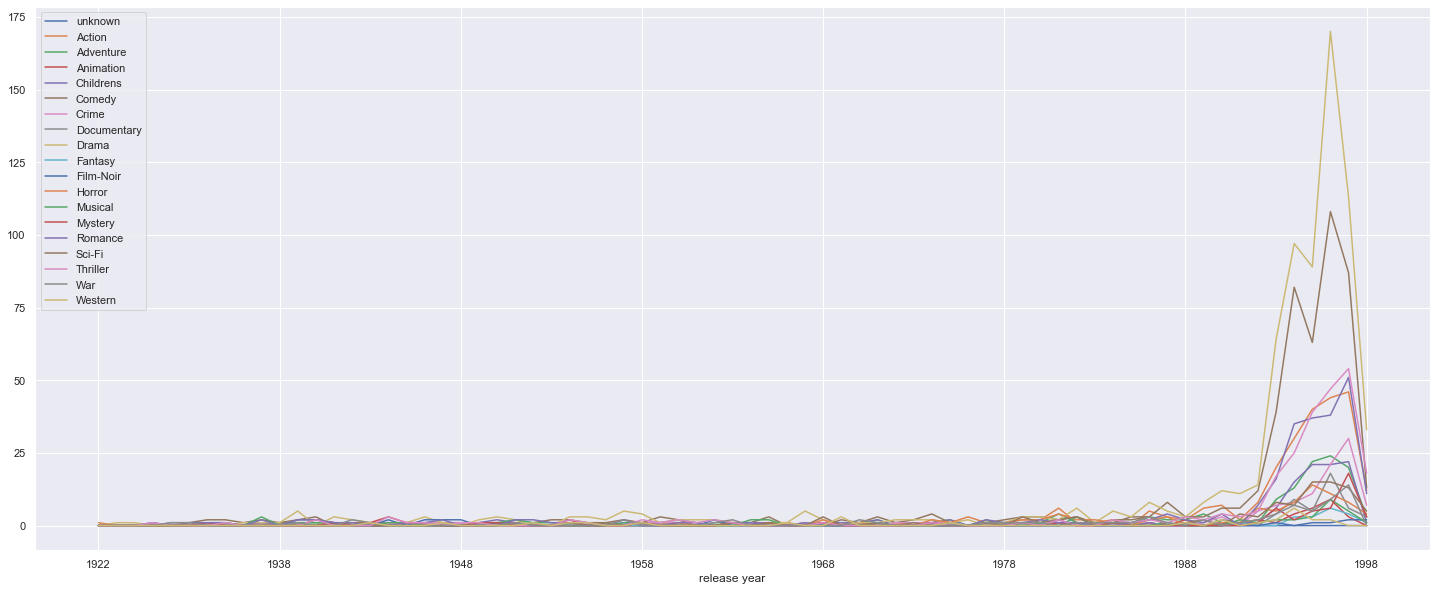

In [110]:
#Your answer here

##############################################################################################
#A graph which shows number of movies of each genre for every year will give us a picture of how
# each genre movie is getting popular over the years
##############################################################################################

# Sort the data frame by year as we have the release year in a new column
dfMovieInfoCopy.sort_values(by='release year',inplace=True)

# # Now groupby release year and get the sum. This will give the count of each genre (column) movie
# # for every year. We can plot this as either a line/bar plot
plot.figure(figsize = (100,10))
dfMovieInfoCopy.groupby('release year').sum().plot(figsize=(25,10));

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [114]:
#your answer here

# group by movie id and get count and find movie which has more than 100 ratings
z1 = df_Rating.groupby('movie id').count()
z1 = z1[z1['user id'] > 100]

# group by movie id and get the mean 
z2 = df_Rating.groupby('movie id').mean()

# z1 and z2 both are grouped by movie id. So column from z2 can be inserted into z1
# and vice versa. Insert the rating column from group z2  into z1.
# Now z1 is grouped by movie id and has the count a which is more than 100 and has the 
# average rating of the movie
z1['avg'] = z2['rating']

# Now sort by average. This will give you top 25 average rated which is having more
# than 100 ratings
z4 = z1.sort_values('avg',ascending=False).head(25)

# group the movie info by movie id which has title
z3 = df_MovieInfo.groupby('movie id')

# Now z4 has the  movie ids as index. Get the movie ids to a list
movidIdList = z4.index.tolist()

##################################################################################
# ANSWER1: THIS WORKS FINE TO PRINT THE MOVIE NAMES BUT THE ISSUE IS THIS IS NOT 
# PRINTING IN THE ORDER OF AVERAGE RATING. THIS PRINTS IF THE MOVIE IS IN TOP25
# RATING
#print(df_MovieInfo[df_MovieInfo['movie id'].isin(l)]['movie title'])
##################################################################################

##################################################################################
#ANSWER2: BUT I WANT TO PRINT THE MOVIE NAMES IN DESCENDING ORDER OF ITS AVERAGE RATING
##################################################################################
# Iterate the index (movieid) list one by one and get the group corresponding to the 
# index in z3 and display its title

pd.options.display.float_format = '{:.3f}'.format

#empty data frame to holdthe results
dfResult = pd.DataFrame(columns=['Avg. rating','movie id','movie title'])

# for i in movidIdList:
#     dfResult = dfResult.append({'Avg. rating':z4.loc[i]['avg'], 'movie id':i,'movie title':z3.get_group(i)['movie title'].values[0]},ignore_index=True)    
# print(dfResult)

#Another way
for mid in movidIdList:
    movienameIdxList = df_MovieInfo[df_MovieInfo['movie id'] == mid]['movie title'].index
    movieName        = df_MovieInfo.loc[movienameIdxList[0]]['movie title']
    dfResult = dfResult.append({'Avg. rating':z4.loc[mid]['avg'],'movie id':mid,'movie title':movieName},ignore_index=True)    
print(dfResult)



    Avg. rating movie id                                        movie title
0         4.491      408                                    Close Shave, A 
1         4.466      318                                  Schindler's List 
2         4.466      169                               Wrong Trousers, The 
3         4.457      483                                        Casablanca 
4         4.445       64                         Shawshank Redemption, The 
5         4.388      603                                       Rear Window 
6         4.386       12                               Usual Suspects, The 
7         4.358       50                                         Star Wars 
8         4.344      178                                      12 Angry Men 
9         4.293      134                                      Citizen Kane 
10        4.292      427                             To Kill a Mockingbird 
11        4.292      357                   One Flew Over the Cuckoo's Nest 
12        4.

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

# -------------------------------------------------------------------------------------
# Percentile comparison of men/women watching each genre:
# -------------------------------------------------------------------------------------

## The below solution shows the percentile of each genre among men and similarly for women.

## Then compare on given each genre (drama/Sci-Fi and Romance) between men and women. 

## This way we can proove one gender is watching more percentile than the other.

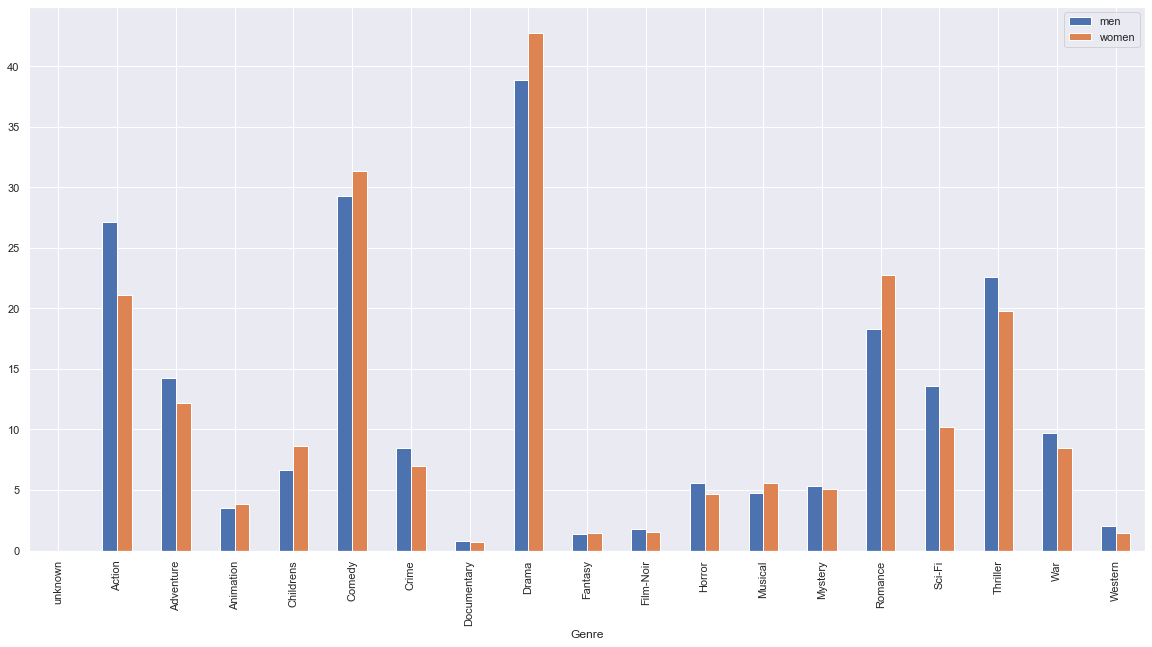

In [119]:
# Create a dataframe with genre, men and women column to hold % of men and women watching each genre
dfPercentile = pd.DataFrame(columns=['Genre','men', 'women'])

# Take all the genre 
genreList = df_MovieInfo.columns[3:]

# get the user ids of men viewers
menUserIds     = df_Audience[df_Audience['gender'] == 'M']['user id'].tolist()

# get the user ids of men viewers
womenUserIds   = df_Audience[df_Audience['gender'] == 'F']['user id'].tolist()

# number of all the genre movies watched and reviewed by men and women
totalMoviesByMen    = df_Rating[df_Rating['user id'].isin(menUserIds)].shape[0]
totalMoviesByWomen  = df_Rating[df_Rating['user id'].isin(womenUserIds)].shape[0]

# Iterate through each genre and find out the men and women watching it. Then divide it by
# totalmen/women count to get the percentile of genre watched by men and women
for gnr in genreList:
    
    # List of movie ids in a given genre
    movieIdListOfGenre = df_MovieInfo[df_MovieInfo[gnr] > 0]['movie id']

    #Find the number of men watching & reviewed this movie
    moviesByMen  = df_Rating[df_Rating['user id'].isin(menUserIds) & (df_Rating['movie id'].isin(movieIdListOfGenre))]
    menPercent   = (moviesByMen.shape[0] * 100)/totalMoviesByMen
    
    #Find the number of women watching & reviewed this movie
    moviesByWomen  = df_Rating[df_Rating['user id'].isin(womenUserIds) & (df_Rating['movie id'].isin(movieIdListOfGenre))]
    womenPercent   = (moviesByWomen.shape[0] * 100)/totalMoviesByWomen
     
    #push the result to the resulting dataframe
    dfPercentile = dfPercentile.append({'Genre':gnr,'men':menPercent,'women':womenPercent},ignore_index=True)

# Plot the result data frame to show the % of men and women watching each genre
pd.options.display.max_rows=None
dfPercentile.set_index('Genre',inplace=True)
pecentPlot = dfPercentile.plot(figsize = (20,10),kind='bar')

# To show all the genre as labels in the xaxis
# set number of ticks
pecentPlot.set_xticks(list(np.arange(dfPercentile.shape[0])));

# set labels for all the ticks
pecentPlot.set_xticklabels(dfPercentile.index);

## Conclusion:
### 1. More than 40% of women watch drama whereas around 38% men watch drama.
### 2. Around 14% of men watch movies and 10% of women watch sci-fi movies
### 3. Around 22% of women watch romantic movies and men is less than 20%

# ---------------------------------------------------------------------------------------
# Countwise comparison of men/women watching each genre:
# ---------------------------------------------------------------------------------------

### This is different than the above solution because eventhough the count of men wathcing a particular genre may be more than women but percentile of women watching that genre may be higher than men. For example, 25 out of 100 men watch drama and 15 out of 50 women are watching drama. This gives 25% men are interesed in drama where as 30% of women watch drama eventhough the number of men (25) watching drama is more than number of women(15) watching drama.

### Get the total count of men and women watching each genre movies and show the how many men and women are watching each genre.

### As we are interested in 3 genres (drama/sci-fi/romance), Im trying to get the count of each genre in a different way to show how can we arrive the count of each genre. Some of the approaches are long but its also a way to get the solution. Goal is not to get optimized code rather to show the different ways to approach the problem.


###  Getting count of men and women watching drama.

In [152]:
#group the movie genre by drame [ 2 groups will be there one with 0 (nondrama), the other with 1(drama)]
# To get all the movie ids of drama gere
x = df_MovieInfo.groupby('Drama')

# group the ratings by movie ids to ge the users who rated this movie.
a = df_Rating.groupby('movie id')

# get the drama group [movie ids which are drama]
s = x.groups[1].size


# create a dummy dataframe to hold the results
dfObj = pd.DataFrame(columns=['title','men', 'women','total'])

# Number of total men and women rated all the drama genre movies
totalMenRatedDrama   = 0
totalWomenRatedDrama = 0

# 1. iterate through each movie id of the drama group
# 2. get the movie rating group for a movie id [ this group gives list of users who rated this movie] 
# 3. iterate through each user id and find men on women
# 4. Inser the movie id, title, number of men and women rated this movie in the dummy dataframe
for mid in range(s):    
    menWatchingDrama   = 0
    womenWatchingDrama = 0    
    movieid    = df_MovieInfo['movie id'][x.groups[1][mid]] 
    movietitle = df_MovieInfo['movie title'][x.groups[1][mid]]
            
    # number of viewers rated this movie
    numusers = a.groups[movieid].size  
        
     # iterate each user
    for uid in range(numusers):
        # get the user id
        userid   = df_Rating['user id'][a.groups[movieid][uid]]
        
        # get the index of correponding to the user id. If there are duplicate user ids in the
        # audience dataframe its array of index. But we assume that there are no duplicate and
        # hence access 0th position in the index array to get the index
        rowindex = df_Audience[(df_Audience['user id'] == userid)].index
        
        # Check the gender belonging to this user id is male, if so increment men count
        if df_Audience.loc[rowindex[0]]['gender'] == 'M':
            menWatchingDrama = menWatchingDrama+1
            
        #else increment the woment count
        else:
            womenWatchingDrama = womenWatchingDrama+1
            
    # so finally we get one entry of movie id which is a drame and number of men rated it and
    # numbe of women rated it. Insert the info in the dummy data frame
    dfObj = dfObj.append({'title':movietitle,'men':menWatchingDrama,'women':womenWatchingDrama,'total': numusers},ignore_index=True)

    totalMenRatedDrama   = totalMenRatedDrama + menWatchingDrama
    totalWomenRatedDrama = totalWomenRatedDrama + womenWatchingDrama
    
# Print result data from if you want to see count for each drama movie
# print(dfObj)
      

print('----------------------------------------------------------')
print("Number of men   watched drama              = ", totalMenRatedDrama)
print("Number of women watched drama              = ", totalWomenRatedDrama)

----------------------------------------------------------
Number of men   watched drama              =  28887
Number of women watched drama              =  11008


### Conclusion: More number of men watched drama than women

### Getting count of men/women watching sci-fi movie

   #### Method 2: We can do the same way how we got for drama. Lets try a different way to show the     possible ways


---------------------------------------------------------------------
No: Actually men are watching more sci-fi movie than women
---------------------------------------------------------------------


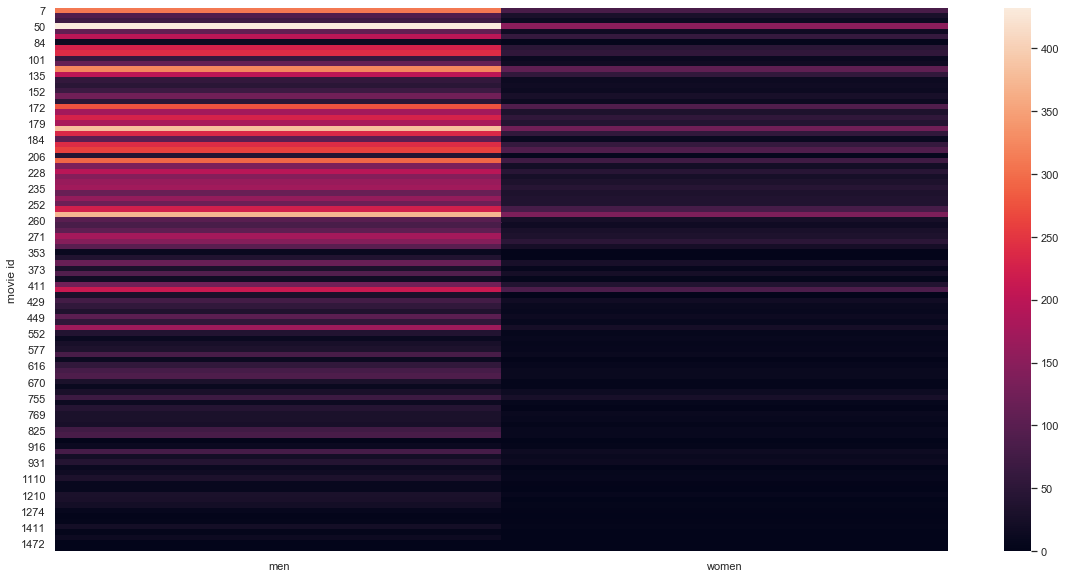

In [155]:
# create dataframe to hold the results
dfSciFiObj = pd.DataFrame(columns=['movie id','title','men', 'women','total'])

# get the index of all sci fiction movies
sciFiRows = df_MovieInfo[(df_MovieInfo['Sci-Fi'] == 1)].index

# for each science fiction movie
for idx in sciFiRows:
    
    # get its movie id and title
    sciFiMovieId    = df_MovieInfo.loc[idx]['movie id']
    sciFiMovieTitle = df_MovieInfo.loc[idx]['movie title']
    
    # get index list of user ids who has done rating for this movie id
    useridIndex  = df_Rating[df_Rating['movie id'] == sciFiMovieId].index
    
    menViewers   = 0;
    womenViewers = 0;    
        
    # for each user id from the list of user ids of a movie id    
    for uidIdx in useridIndex:     
        
        # get the user id
        userid   = df_Rating.loc[uidIdx]['user id']
        
        # get the index of the user id from the user/viewr data frame
        audIndex = df_Audience[(df_Audience['user id'] == userid)].index

        # Check if the user is men/women and increment the counts
        for k in audIndex:
            if df_Audience.loc[k]['gender']=='M':
                menViewers = menViewers+1
            else:
                womenViewers = womenViewers+1
                 
    # Now we found for a given movie id, the number of men and women viewes who rate it
    # add it to the data frame
    dfSciFiObj = dfSciFiObj.append({'movie id': sciFiMovieId,'title':sciFiMovieTitle,'men':menViewers,'women':womenViewers, 'total':useridIndex.shape[0]},ignore_index=True)
    
# Print result data from if you want to see men/women count for each sci-fi movie  
#print(dfSciFiObj)

sumOfViewers = dfSciFiObj.sum()
print("")
print("---------------------------------------------------------------------")
if sumOfViewers['women'] > sumOfViewers['men']:
    print("Yes: Women are watching more sci-fi movie than men")
else:
    print("No: Actually men are watching more sci-fi movie than women")
print("---------------------------------------------------------------------")

# Visualize the heatmap of men and women viewers of sci-Fi movies
dfSciFiObj.drop(['title','total'],axis=1,inplace=True)
dfSciFiObj.set_index('movie id',inplace=True)
dfSciFiObj.fillna(value=np.nan, inplace=True)
plot.figure(figsize = (20,10))
sns.heatmap(dfSciFiObj)

## Number of men watching sci-fi movie is more than women.

### Getting count of men/women watching romance movie

   #### Method 3: Lets try a different way than how we did for drama and sci-fi movie

In [159]:
# get list of index of the romantic movies
romanceMovieIndex = df_MovieInfo[df_MovieInfo['Romance'] > 0].index

menViewersCount   = 0
womenviewersCount = 0

# iterate each romantic movie index
for mindex in romanceMovieIndex:
    
    # For every romantic movie index, get the  movie id. 
    # get all the list of users who rated this movie
    useridList        = df_Rating[df_Rating['movie id'] == df_MovieInfo.loc[mindex]['movie id']]['user id'].tolist()
    
    # Check in the viewers dataframe to see who are all in the above list are men.
    menViewersDf      = df_Audience[(df_Audience['user id'].isin(useridList)) & (df_Audience['gender']== 'M')]   
    
    # Just to make sure the df does not have duplicates
    menViewersDf      = menViewersDf.drop_duplicates()
    
    # get the size of the data frame which is nothing but the number of men who reviewed the movie
    # at the mindex location.
    # To get count either i can use menViewersDf.shape[0] or one of columns count
    menViewersCount   = menViewersCount + menViewersDf['user id'].count()
    
    # Repeat the same thing for female viewers
    womenViewersDf    = df_Audience[(df_Audience['user id'].isin(useridList)) & (df_Audience['gender']== 'F')]   
    womenViewersDf    = womenViewersDf.drop_duplicates()
    womenviewersCount = womenviewersCount + womenViewersDf.shape[0]

print("---------------------------------------------------------------------")
print("Number of men   watching romantic movies = ", menViewersCount)        
print("Number of women watching romantic movies = ", womenviewersCount) 

if menViewersCount > womenviewersCount:
    print("Yes: men are watching more romance movies than women")
else:
    print("No: women are watching more romance movies than men")
    
print("---------------------------------------------------------------------")
    
    

---------------------------------------------------------------------
Number of men   watching romantic movies =  13603
Number of women watching romantic movies =  5858
Yes: men are watching more romance movies than women
---------------------------------------------------------------------


## Conclusion: Number of men watching romance movies is higher than women.